File ../ResultFiles/OrbitSample.csv.2015.CoverageResults.txt already exists. Cannot continue in order to prevent overwriting useful data.
 -- COVERAGE RESULTS -- 
 Date of execution: 25-08-2022 20:28:54
 Title: 
 Description: 
 Parsed 125949 lines from orbit file ../../Sample_Data/orbital_data\OrbitSample.csv
 Used Kp indices starting from year 2015
 Bin Misses: 12861     Bin Hits: 2388
 Duration of execution: 7 seconds  or  0.11 minutes
 
AEM_L1  : 22<MLT<=02 060<MagLat<=075 115<Alt<=120 0<Kp<=2 Coverage=    0.000/ 50.00min        0/ 3000sec
AEM_L2  : 22<MLT<=02 060<MagLat<=075 120<Alt<=125 0<Kp<=2 Coverage=   44.000/ 50.00min     2640/ 3000sec
AEM_L3  : 22<MLT<=02 060<MagLat<=075 125<Alt<=130 0<Kp<=2 Coverage=    0.000/ 50.00min        0/ 3000sec
AEM_L4  : 22<MLT<=02 060<MagLat<=075 130<Alt<=135 0<Kp<=2 Coverage=    0.000/ 50.00min        0/ 3000sec
AEM_L5  : 22<MLT<=02 060<MagLat<=075 135<Alt<=140 0<Kp<=2 Coverage=    0.000/ 50.00min        0/ 3000sec
AEM_L6  : 22<MLT<=02 060<MagLat

I will plot 2058 dots


C:\Users\bdimi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



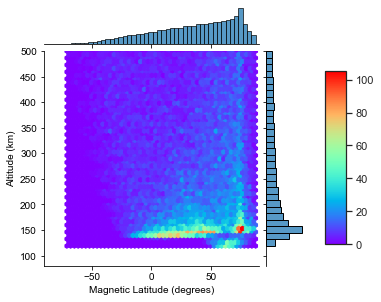

In [1]:
import sys
sys.path.append("../daedalusmase_coverage_calculator/")

# module imports
from data import *
from plot import *

# The following function adds magnetic coordinates information to a csv orbit file. 
# Takes as input the fields Time, Latitude, Longitude, Altitude and adds the fields Magnetic Latitude, Magnetic Longitude and Magnetic Local Time
# It requires the apexpy library
#from orbit_file_conversions import add_magnetic_coordinates
#add_magnetic_coordinates( "orbit1.csv", "orbit2.csv" )

# -------- initialization --------
#set_orbit_files_path("") # call this to define another path than the default "../../Sample_Data/orbital_data/"
#set_coverage_results_files_path("")  # call this to define another path than the default "../ResultFiles/"
#set_geomagnetic_indices_files_path("") # call this to define another path than the default "../../Sample_Data/geomagnetic_indices/"
#ClearBins() # call this if you do not want to work with the predefined Bins 
create_new_bin( "SMP_A1", "Sample region", 22, 2,   70, 80,   100, 150,               4, 9,   20*60 )
read_geomagnetic_indices(2015, 2016) # read as few as possible for speed/memory reasons

# -------- Calculation --------
BinMisses, BinHits, ResultsFilename, Duration = calculate_coverage( "Sample Execution", 
                                                                    "These results are created for demonstration purposes.", 
                                                                    "OrbitSample.csv", 
                                                                    "2015" )

if(BinMisses==0 and BinHits==0 and Duration==0): # the calculation has been executed before and the results are stored. So load them.
    # -------- Loading --------
    load_coverage_results( CoverageResults_Files_Path + "OrbitSample.csv.2015.CoverageResults.txt" )
else:
    print("Number of Bin hits:", BinHits )
    print("Number of Bin misses:", BinMisses)
    print("Results are stored in", ResultsFilename) 
    print("Calculation took", Duration, "sec")
    
# -------- Ploting --------
plot_coverage_bars( "My Title" )
plot_coverage_bars_grouped_by_region( "My Title", [ ["SMP"], ["AEE", "AEM","AED"],  ["AFM","CF","PCF"],  ["EPB", "SQ"],  ["EEJ"] ] )
plot_coverage_polar_chart( "My Title", 1.4 )
plot_orbit_kp_scatter("OrbitSample.csv", 2015, "01-01-2015", "20-01-2015", 100, 220 )
plot_orbit_heatmap( "OrbitSample.csv" )
